## Data Visualization: Hurricane Florence (U.S.)

In [19]:
import geopandas as gpd

In [20]:
import pandas as pd
import numpy as np

In [21]:
from shapely.geometry import Point

In [22]:
import missingno as msn

In [23]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

In [36]:
# Getting to know GEOJSON file:
country = gpd.read_file("gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [37]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [38]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [39]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

<AxesSubplot:>

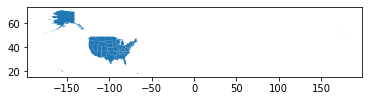

In [40]:
country.plot()

<AxesSubplot:>

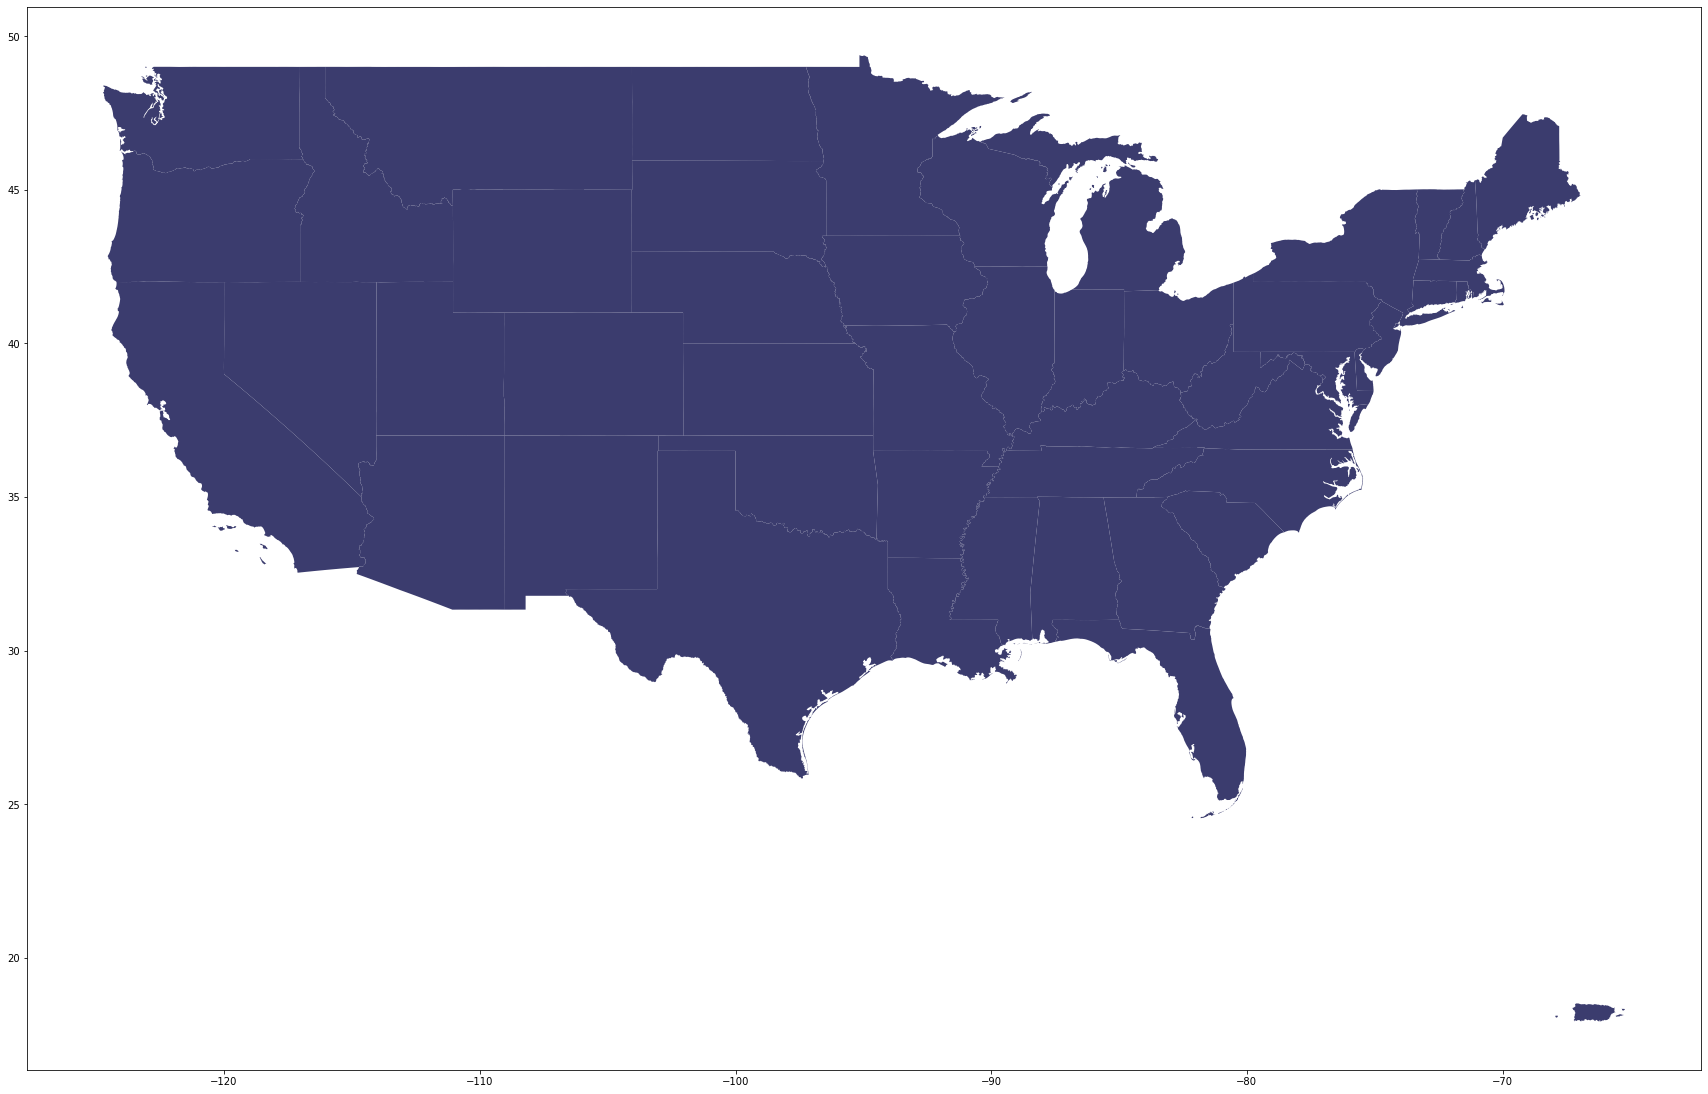

In [54]:
# Excluding Alaska and Hawaii from 'country' dataset
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E')

In [69]:
florence = pd.read_csv('hur-florence.csv')
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,GPS_GEOHASH,Geo_
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila,drm3btev3e86,POINT (-71.34 41.12)
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila,drm3btev3e86,POINT (-71.34 41.12)
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila,drm3btev3e86,POINT (-71.34 41.12)
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven,drm3btev3e86,POINT (-71.34 41.12)
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven,drm3btev3e86,POINT (-71.34 41.12)


In [70]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
 11  GPS_GEOHASH     105 non-null    object 
 12  Geo_            105 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 10.8+ KB


<AxesSubplot:>

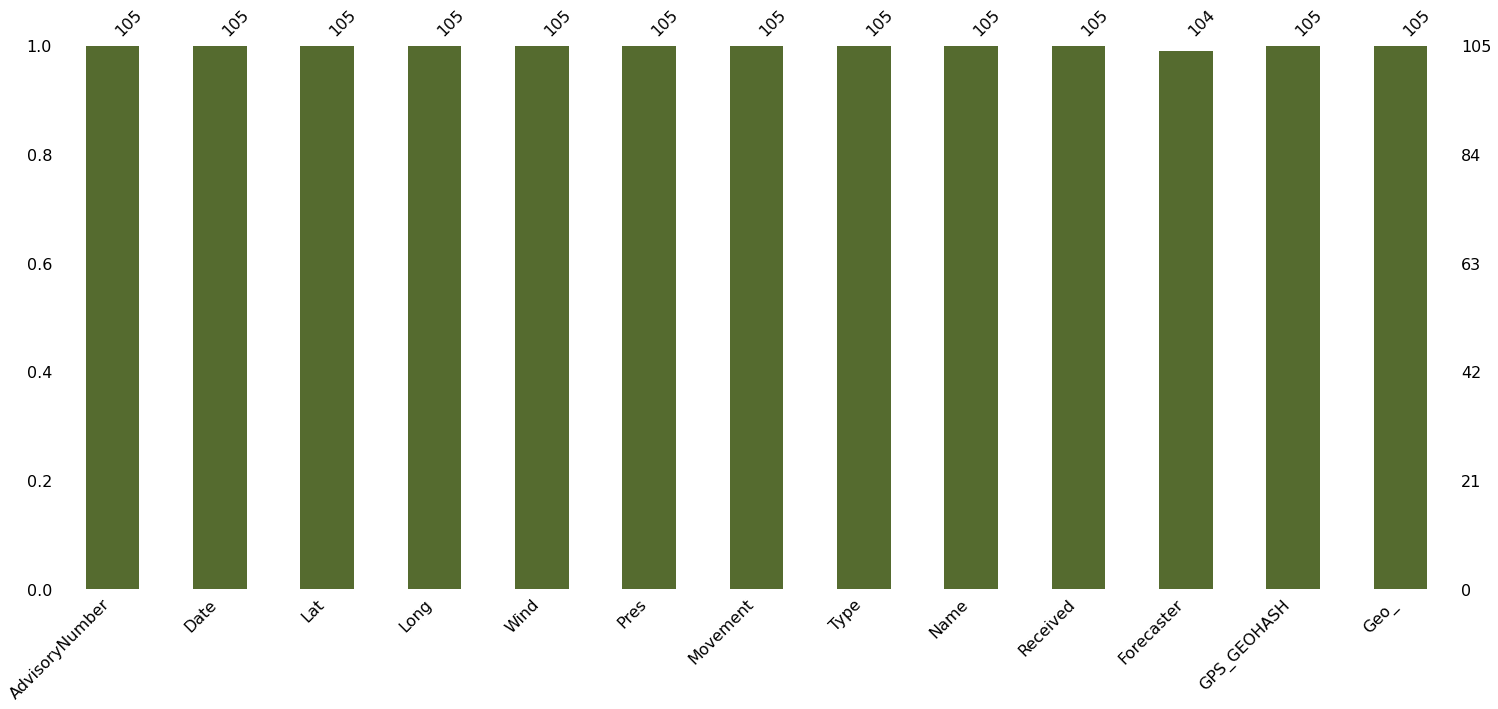

In [71]:
msn.bar(florence, color='darkolivegreen')

In [73]:
#Statistical information
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


In [75]:
# dropping all unused features:
florence = florence.drop(['AdvisoryNumber', 'Received', 'Forecaster'], axis=1)
florence.head()


,Date,Lat,Long,Wind,Pres,Movement,Type,Name,GPS_GEOHASH,Geo_
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12)
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12)
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12)
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12)
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12)


In [76]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,GPS_GEOHASH,Geo_,coordinates
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),"[18.4, 12.9]"
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),"[19.0, 12.9]"
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),"[19.4, 12.9]"
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),"[20.4, 13.1]"
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),"[20.9, 13.2]"


In [77]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,GPS_GEOHASH,Geo_,coordinates
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (18.4 12.9)
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (19 12.9)
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (19.4 12.9)
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (20.4 13.1)
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (20.9 13.2)


In [78]:
type(florence)

pandas.core.frame.DataFrame

In [79]:
type(florence['coordinates'])

pandas.core.series.Series

In [82]:
# Convert the count df to geodf
florence = gpd.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,GPS_GEOHASH,Geo_,coordinates
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (18.40000 12.90000)
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (19.00000 12.90000)
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (19.40000 12.90000)
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (20.40000 13.10000)
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (20.90000 13.20000)


In [83]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [84]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [85]:
# Filtering from before the hurricane was named.
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,GPS_GEOHASH,Geo_,coordinates
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (18.40000 12.90000)
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (19.00000 12.90000)
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (19.40000 12.90000)
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (20.40000 13.10000)
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (20.90000 13.20000)
5,08/31/2018 02:00,13.4,21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (21.20000 13.40000)
6,08/31/2018 05:00,13.6,21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (21.40000 13.60000)
7,08/31/2018 08:00,13.7,21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (21.80000 13.70000)
8,08/31/2018 11:00,13.7,22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (22.70000 13.70000)
9,08/31/2018 14:00,13.8,23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,drm3btev3e86,POINT (-71.34 41.12),POINT (23.30000 13.80000)


In [86]:
# Groupping by name to see how many names it has in the data set:
florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [90]:
#Finding the mean wind speed of hurrican Florence:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4), 
florence.Wind.max()))


Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


<AxesSubplot:>

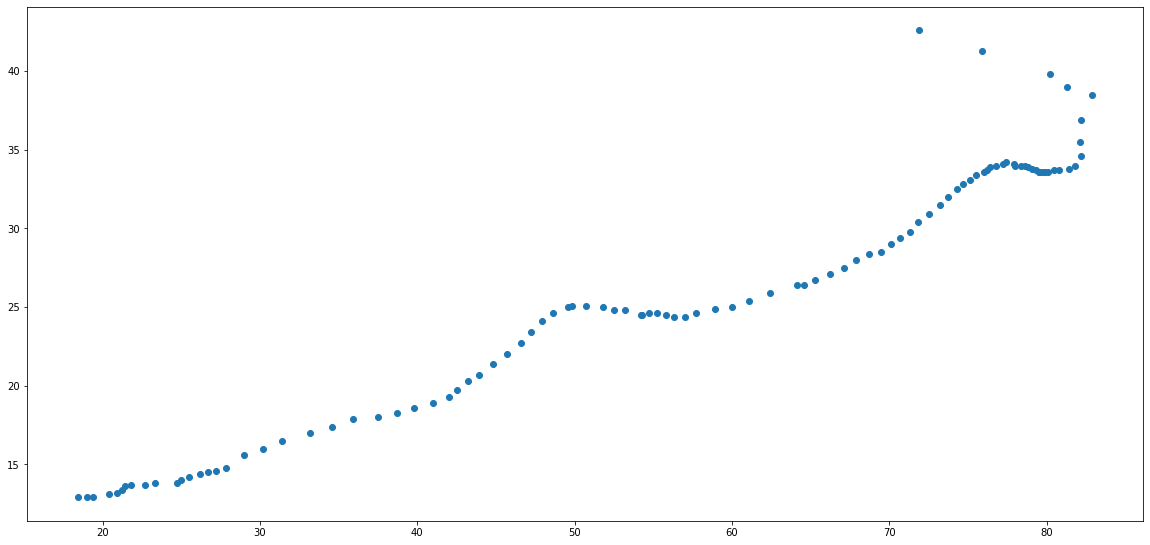

In [93]:
# Visualization
# Similar to pandas Dataframe, a GeoDataFrame also has .plot attribute. However, this attribute 
# makes use of the coordinate within the GeoDataFrame to map it out. Let's take a look:

florence.plot(figsize=(20,10))

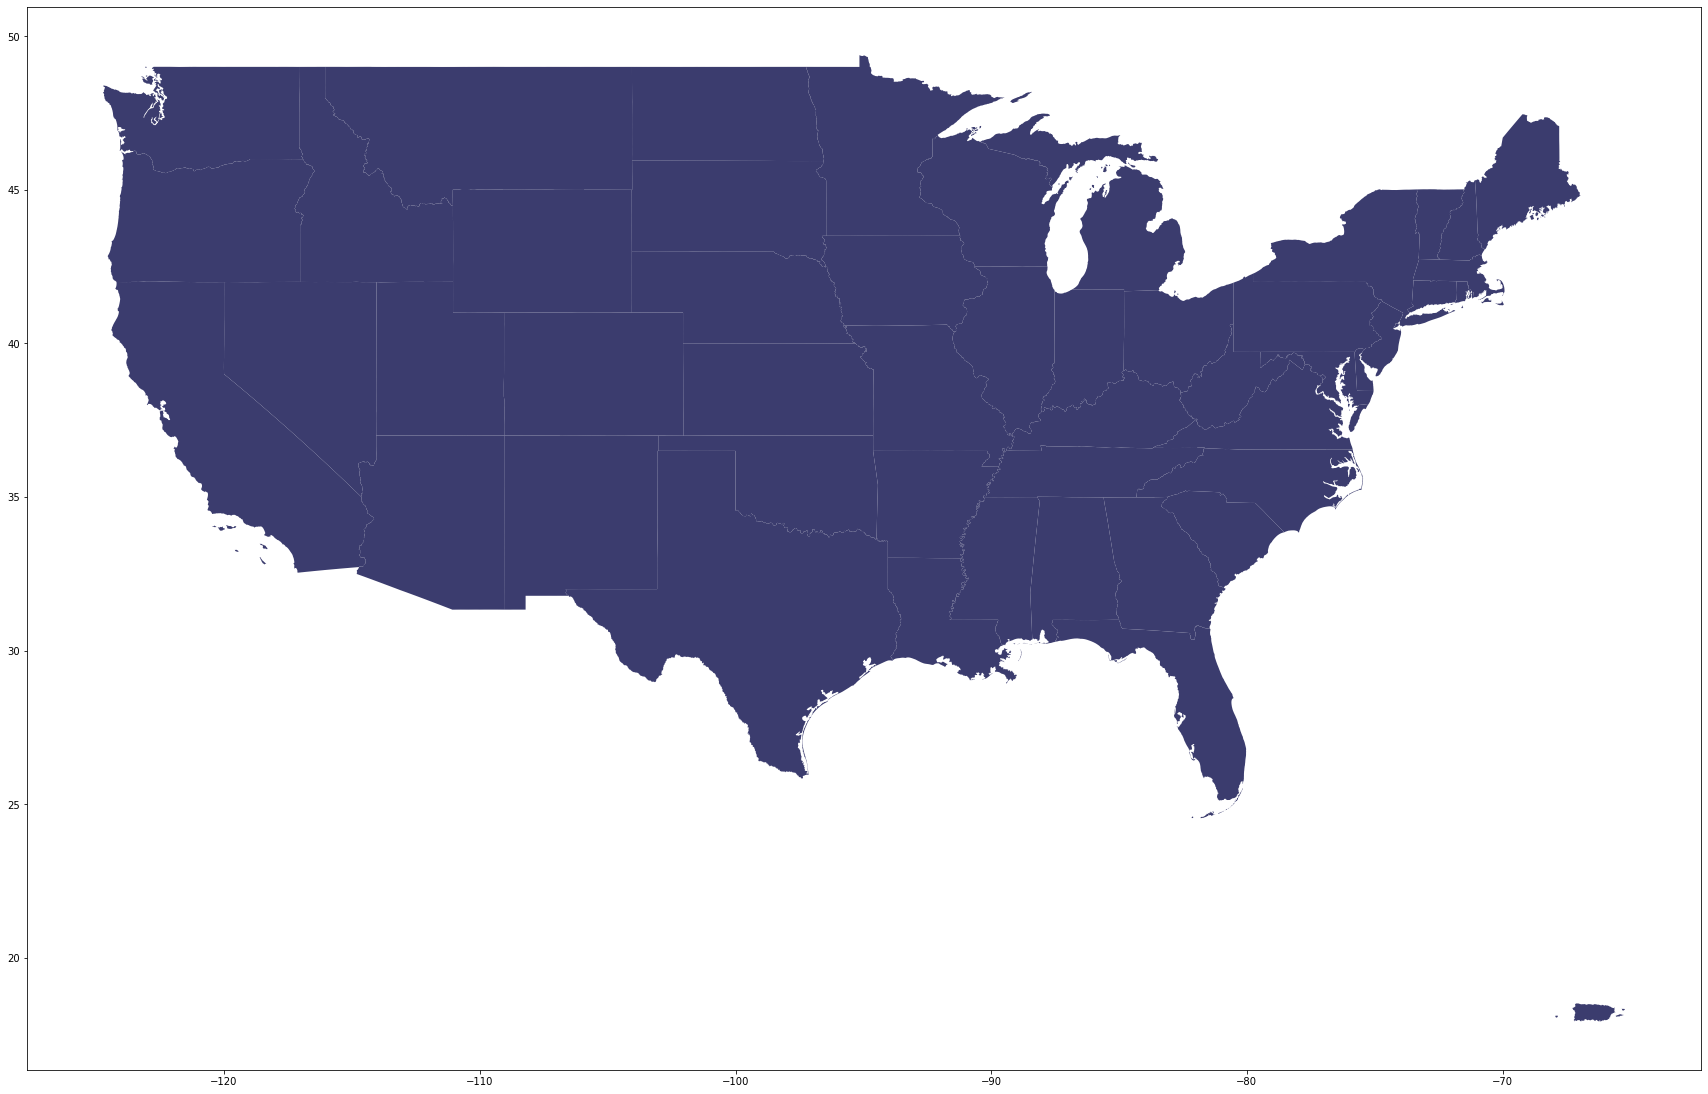

In [94]:
#the next step is plotting the hurricane position on the US map to see where it hit and how strong it was at that time.
# Plotting to see the hurricane overlay the US map:

fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')


In [95]:
# plotting the hurricane position on top with red color to stand out:

florence.plot(ax=base, color='darkred', marker="*", markersize=10)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Hurricane Florence in US Map')

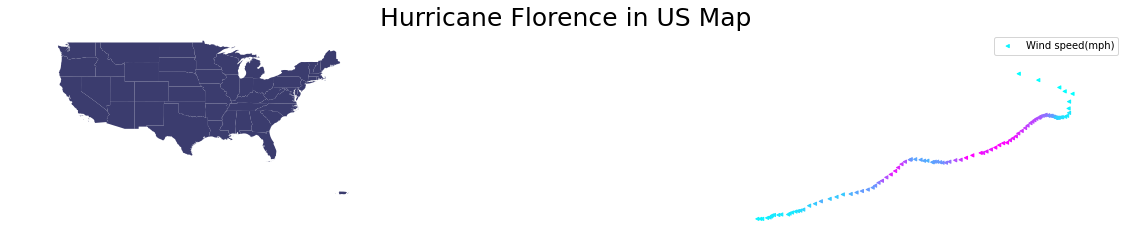

In [104]:
fig, ax = plt.subplots(1, figsize=(20,20))

base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

florence.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")

_ = ax.axis('off')

plt.legend()

ax.set_title("Hurricane Florence in US Map", fontsize=25)



In [99]:
plt.savefig('Hurricane_footage.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>